In [25]:
import numpy as np
import pandas as pd
import cv2
import imutils
from PIL import Image
# import zbar
import os

from pyzbar.pyzbar import decode

In [26]:
import tensorflow as tf
from keras_retinanet.models import load_model

In [27]:
import matplotlib.pyplot as plt

In [28]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

In [29]:
import skimage

In [31]:
# load the image and convert it to grayscale
image = cv2.imread("../data/BarcodeDatasets/Dataset1/05102009081.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [32]:
def get_msers(gray):
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(gray)
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    return regions, hulls

In [34]:
def get_bar_neighborhood(image, hull, padding=10):
    (x, y), (width, height), angle = cv2.minAreaRect(hull)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    print(rect)
    print(box)
    
    Xs = [x[0] for x in box]
    Ys = [y[1] for y in box]
    x1 = min(Xs)
    y1 = min(Ys)
    x2 = max(Xs)
    y2 = max(Ys)
    print(x1, x2, y1, y2)
    
    return image[y1:y2, x1:x2]

In [35]:
def is_inside_annotated_box(image, hull, padding=10):
    return 0

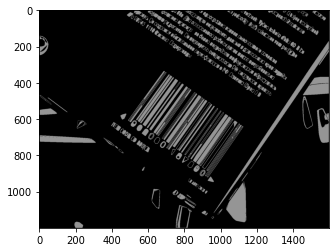

In [38]:
mask = np.zeros((gray.shape), dtype=np.int8)
regions, hulls = get_msers(gray)
mask_all = cv2.drawContours(mask, hulls, -1, 255, -1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mask_all, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

0 : (8, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


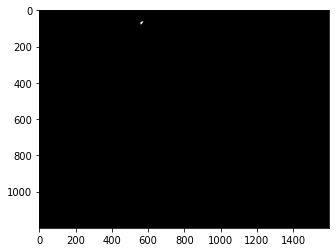

1 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


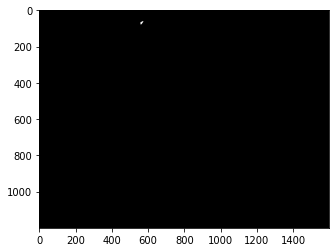

2 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


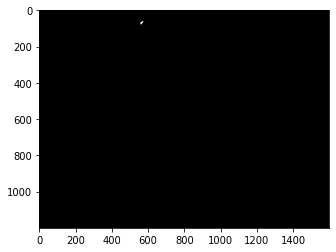

3 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


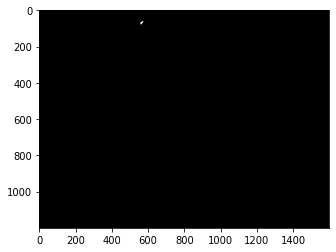

4 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


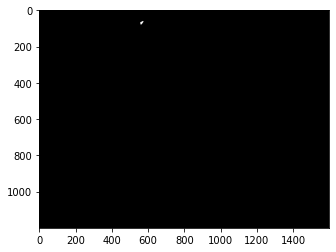

5 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


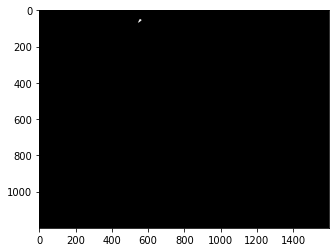

6 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


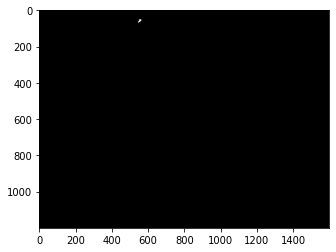

7 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


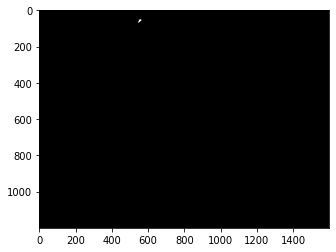

8 : (8, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


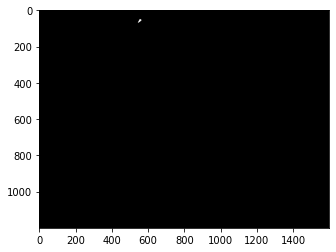

9 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


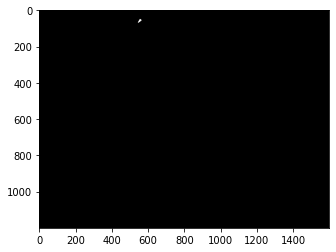

10 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


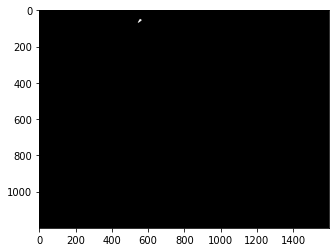

11 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


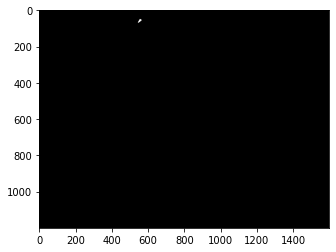

12 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


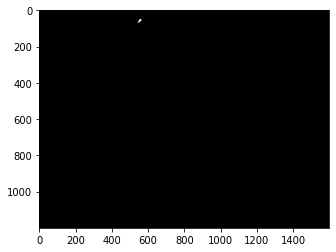

13 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


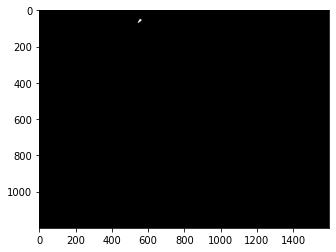

14 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


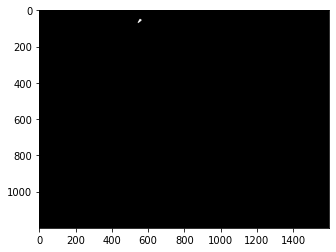

15 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


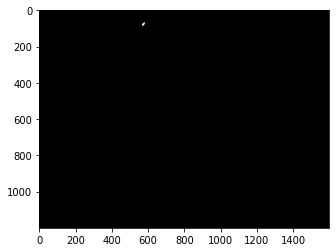

16 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


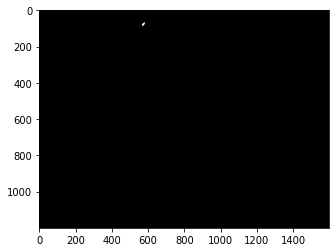

17 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


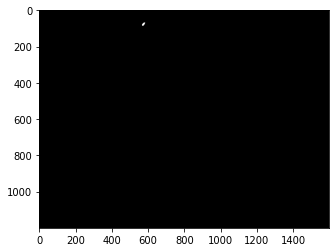

18 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


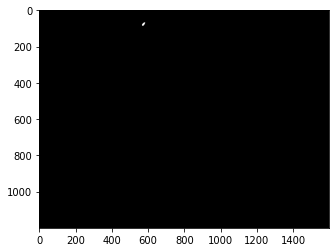

19 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


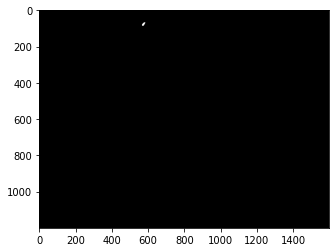

20 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


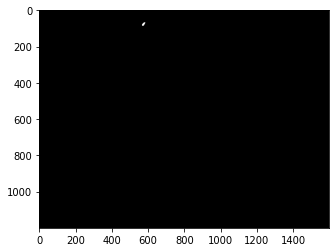

21 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


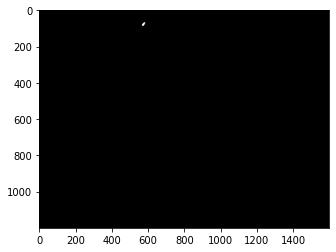

22 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


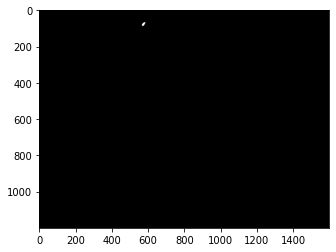

23 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


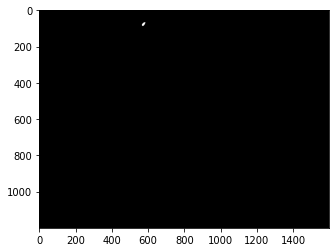

24 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


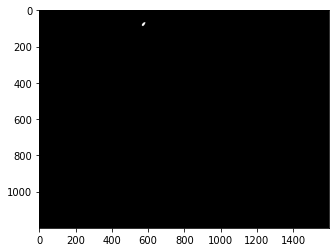

25 : (7, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


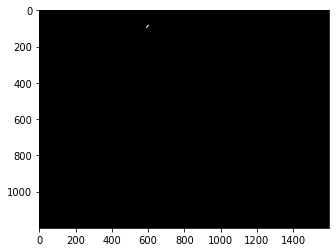

26 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


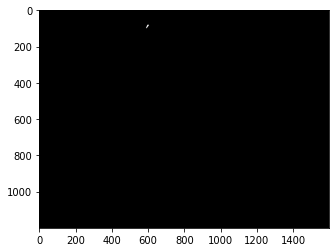

27 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


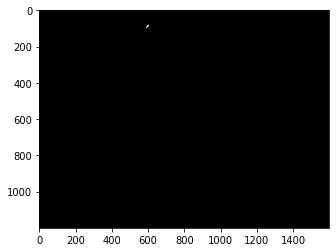

28 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


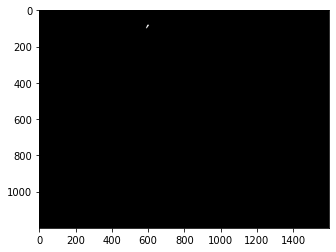

29 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


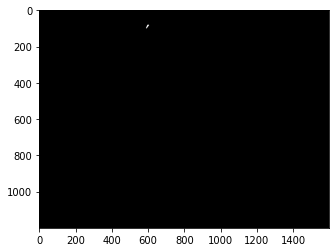

30 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


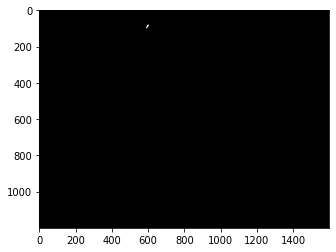

31 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


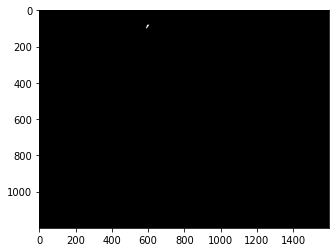

32 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


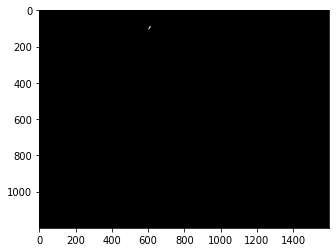

33 : (7, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


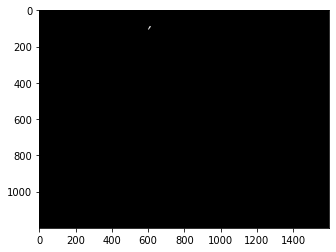

34 : (7, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


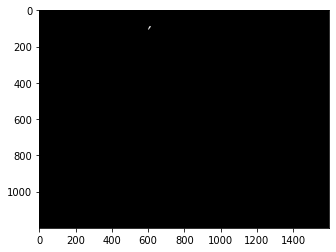

35 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


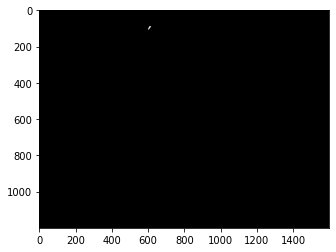

36 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


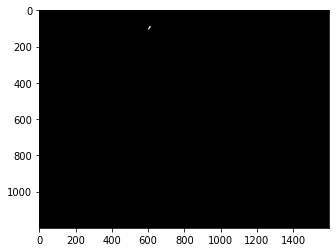

37 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


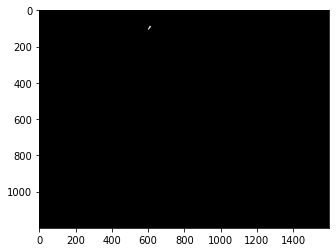

38 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


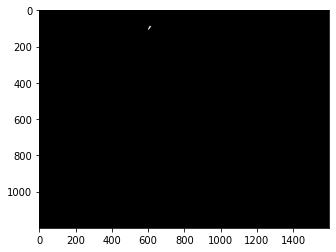

39 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


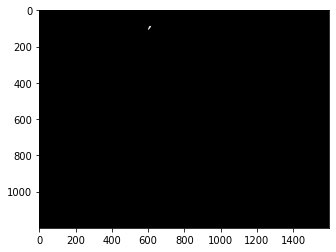

40 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


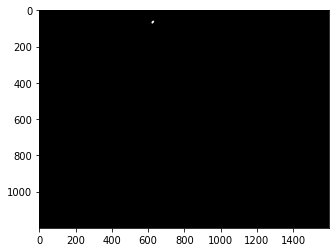

41 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


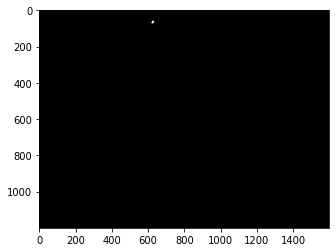

42 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


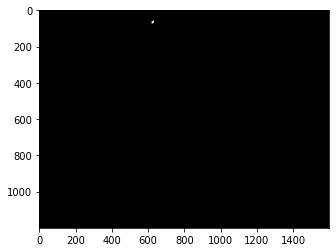

43 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


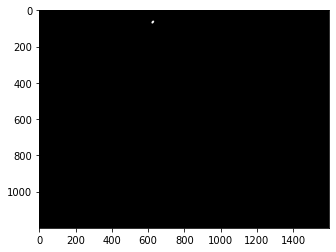

44 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


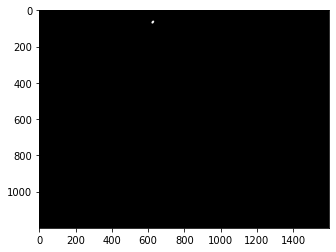

45 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


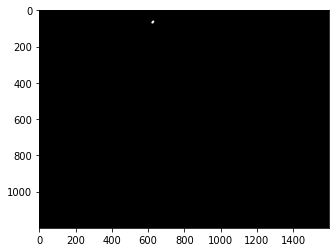

46 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


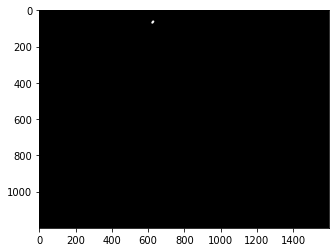

47 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


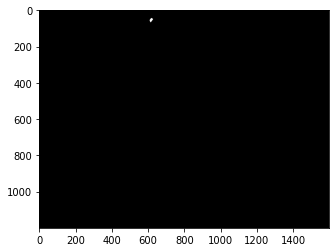

48 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


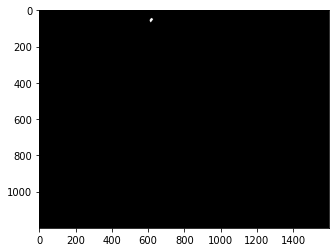

49 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


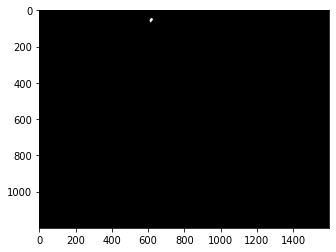

50 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


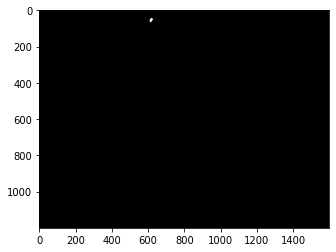

51 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


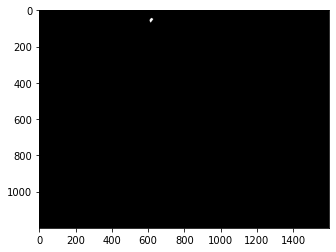

52 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


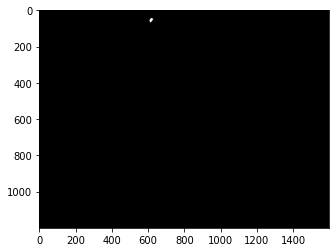

53 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


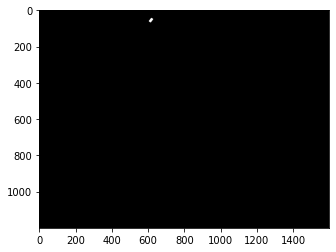

54 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


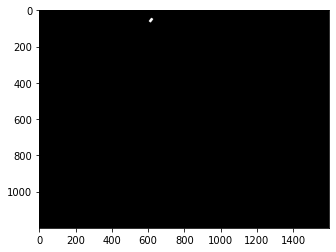

55 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


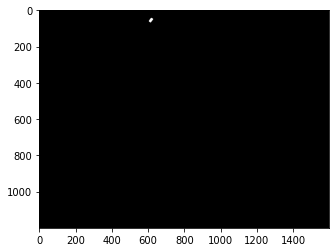

56 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


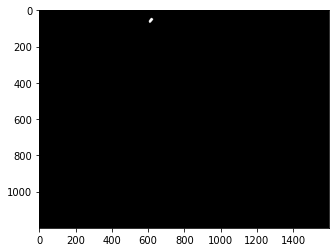

57 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


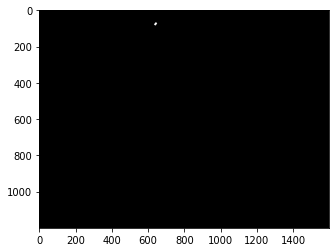

58 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


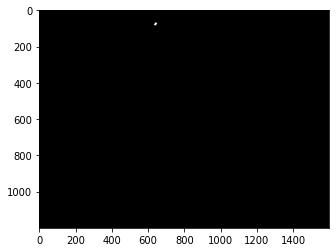

59 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


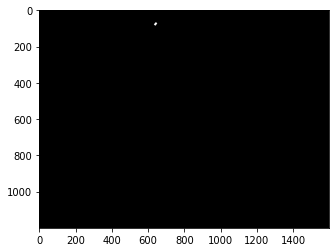

60 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


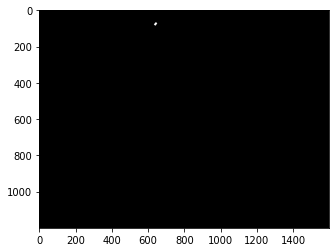

61 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


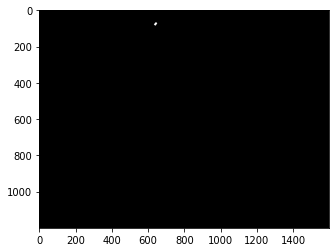

62 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


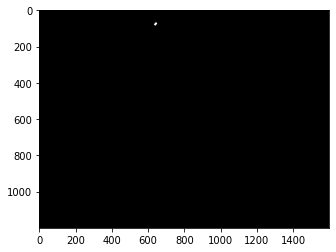

63 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


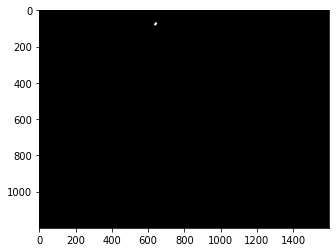

64 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


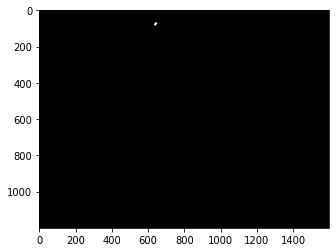

65 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


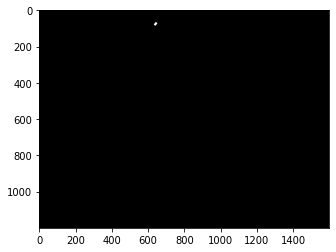

66 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


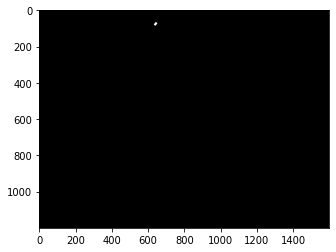

67 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


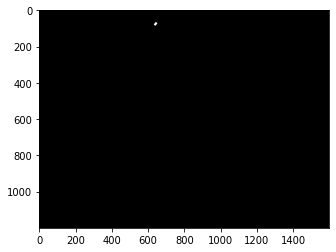

68 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


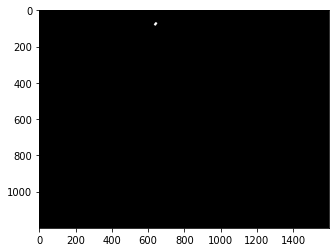

69 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


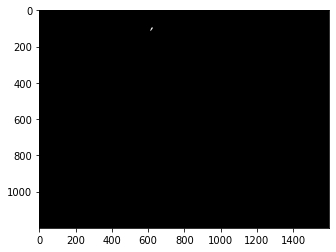

70 : (6, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


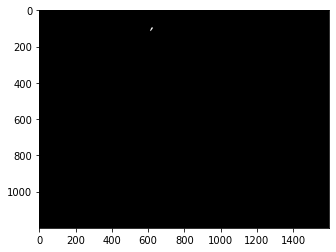

71 : (6, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


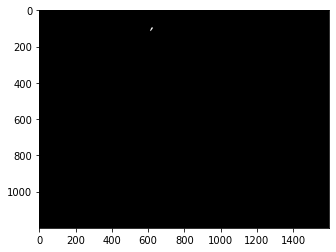

72 : (8, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


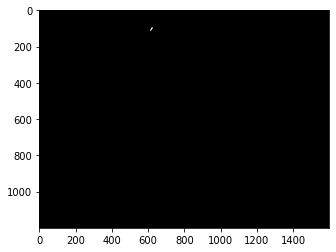

73 : (8, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


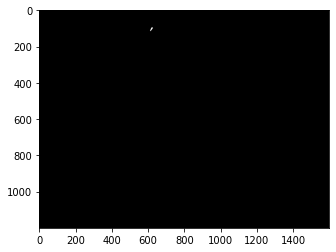

74 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


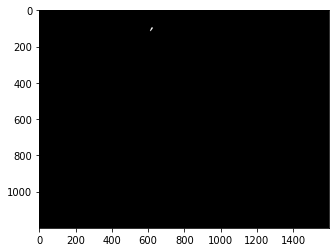

75 : (9, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


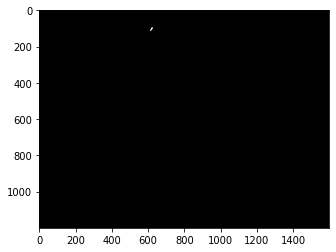

76 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


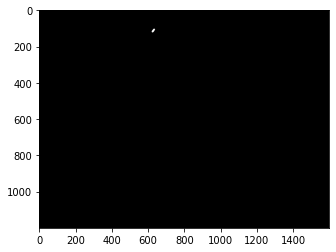

77 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


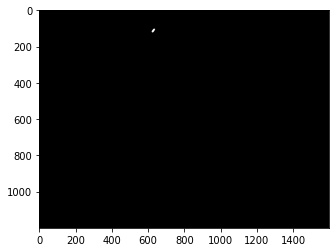

78 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


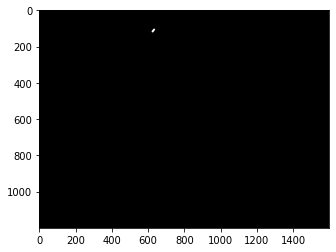

79 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


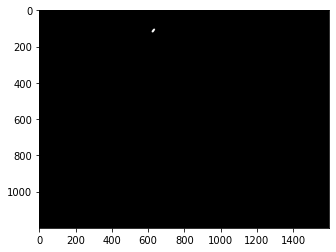

80 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


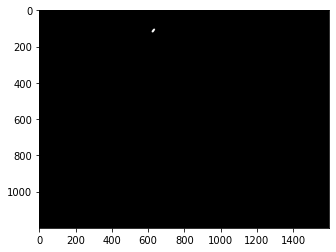

81 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


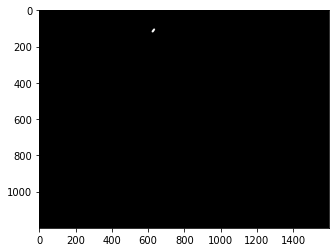

82 : (15, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


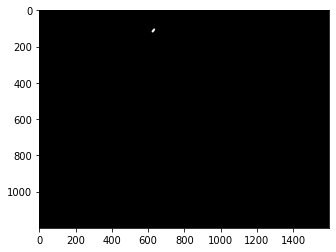

83 : (15, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


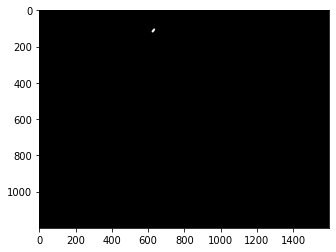

84 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


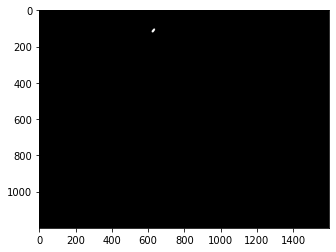

85 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


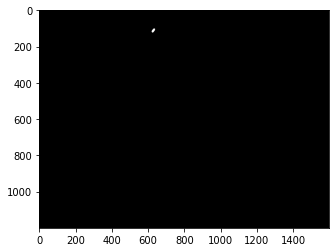

86 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


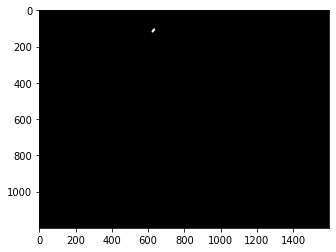

87 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


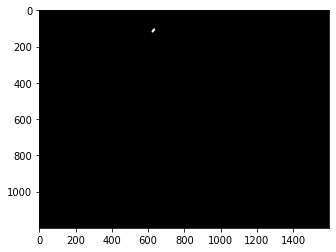

88 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


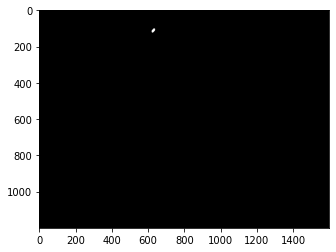

89 : (12, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


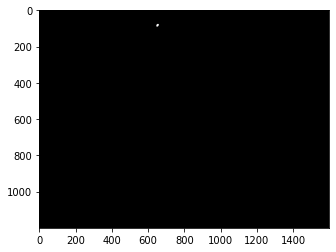

90 : (11, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


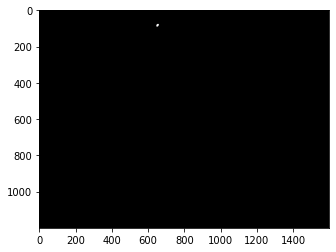

91 : (16, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


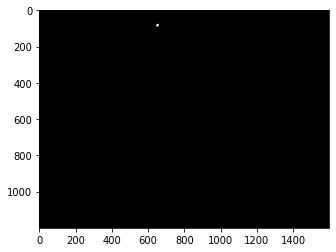

92 : (16, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


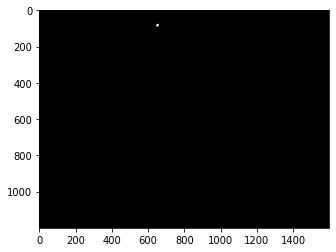

93 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


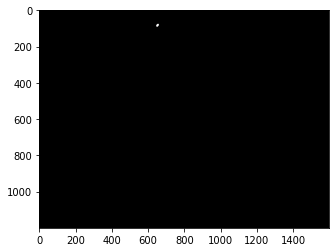

94 : (13, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


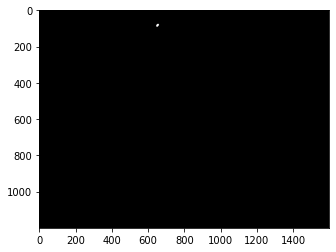

95 : (15, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


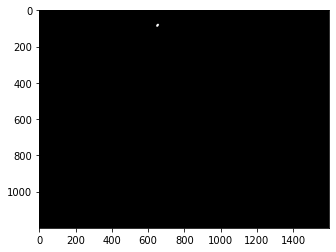

96 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


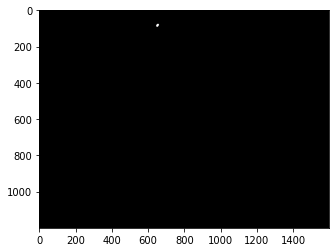

97 : (14, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


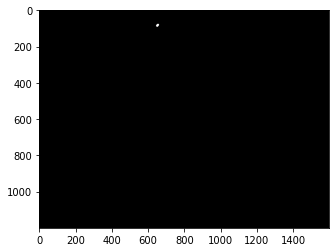

98 : (15, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


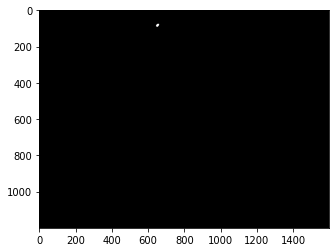

99 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


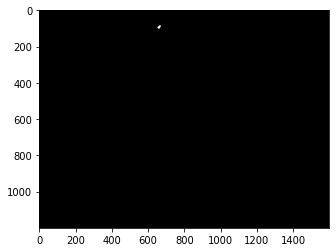

100 : (10, 1, 2)
((806.9459228515625, 629.6756591796875), (597.745361328125, 409.65667724609375), 35.53767776489258)
[[ 444  622]
 [ 682  289]
 [1169  636]
 [ 931  970]]
444 1169 289 970
(681, 725)


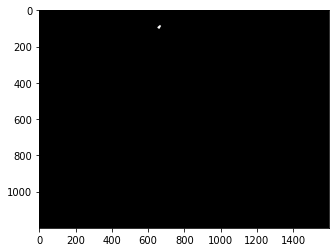

In [68]:
regions, hulls = get_msers(gray)
mask_all = cv2.drawContours(mask, hulls, -1, 255, -1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mask_all, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

selected_hulls = []
label = 1
for index, hull in enumerate(hulls):
    print(index, ":", hull.shape)
    # bar_img = get_bar_neighborhood(gray, hull)
    print(bar_img.shape)
    # label = classify(bar_img)
    if label == 1:
        selected_hulls.append(hull)
    
    mask = np.zeros(gray.shape, np.uint8)
    mask = cv2.drawContours(mask, [hull], -1, 255, -1)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mask, cmap='Greys_r', vmin=0, vmax=255)
    plt.show()
        
    if index == 100:
        break

In [93]:
def extract_features(hull):
    
    mask = np.zeros(gray.shape, np.uint8)
    mask = cv2.drawContours(mask, [hull], -1, 255, -1)
    
    mean_intensity = cv2.mean(gray, mask = mask)
    area = cv2.contourArea(hull)

    (x, y), (width, height), angle = cv2.minAreaRect(hull)
    aspect_ratio = max(width, height) / min(width, height)
    
    features = {'mean_intensity': mean_intensity[0], 
                'area': area, 
                'aspect_ratio': aspect_ratio, 
                'angle': angle}
    
    return features

In [85]:
def classify(feats):
    if feats['mean_intensity'] < 100 and feats['area'] > 1500 and feats['aspect_ratio'] > 10.0:
        return 1
    else:
        return 0

In [86]:
def get_barcode_region(hulls):
    
    selected_hulls = []
    for index, hull in enumerate(hulls):    
        features = extract_features(hull)
        if classify(features) == 1:
            selected_hulls.append(hull)
            
    mask = np.zeros(gray.shape, np.uint8)
    mask_all = cv2.drawContours(mask, selected_hulls, -1, 255, -1)
    
    kernel = np.ones((5,5), np.uint8)
    mask_d = cv2.dilate(mask_all, kernel, iterations=10)
    
    contours, hierarchy = cv2.findContours(mask_d, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rect = cv2.minAreaRect(contours[0])
    
    cropped_barcode_reg = get_rotated_cropped_image(gray, rect)
    return cropped_barcode_reg

In [96]:
def show_barcode(cropped_barcode_reg, outpath=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(cropped_barcode_reg, cmap='Greys_r', vmin=0, vmax=255)
    
    if outpath is not None:
        plt.savefig(outpath)
        plt.close()
    else:
        plt.show()

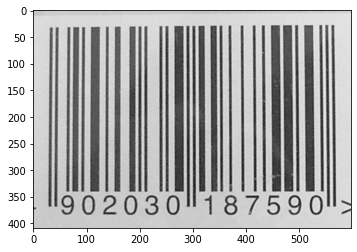

In [76]:
show_barcode(cropped_barcode_reg)

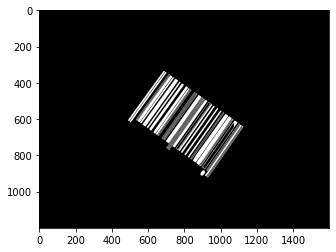

(165.32835820895522, 0.0, 0.0, 0.0) 432.5 20663670 1.719999805787322


In [39]:
# kernel = np.ones((5,5), np.uint8)

# cnt = 0
selected_hulls = []
for index, hull in enumerate(hulls):
    
    mask = np.zeros(gray.shape, np.uint8)
    mask = cv2.drawContours(mask, [hull], -1, 255, -1)
    # mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    # mask = mask_from_contours(image, hull)
    mean_val = cv2.mean(gray, mask = mask)
    area = cv2.contourArea(hull)
    
    (x, y), (width, height), angle = cv2.minAreaRect(hull)
    aspect_ratio = max(width, height) / min(width, height)
    
    # print(mean_val, area)
    if mean_val[0] < 100 and area > 1500 and aspect_ratio > 10.0:
        # print(np.unique(mask))
        # print(mask)
        selected_hulls.append(hull)
        # cnt += 1
        
    # if cnt==50:
    #     break
        
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# mask_d = cv2.dilate(mask, kernel, iterations=10)
mask_all = cv2.drawContours(mask, selected_hulls, -1, 255, -1)
ax.imshow(mask_all, cmap='Greys_r', vmin=0, vmax=255)
plt.show()
print(mean_val, area, np.sum(mask), aspect_ratio)

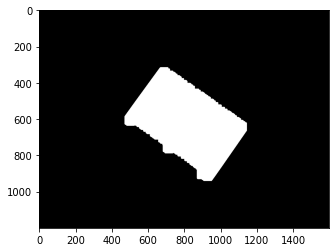

In [40]:
kernel = np.ones((5,5), np.uint8)
mask_d = cv2.dilate(mask_all, kernel, iterations=10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mask_d, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

1


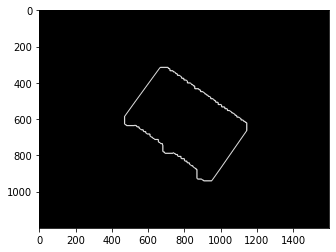

45.0


In [49]:
contours, hierarchy = cv2.findContours(mask_d, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask_one = np.zeros(gray.shape, np.uint8)
mask_one = cv2.drawContours(mask_one, contours, -1, (255,255,255), 3)
print(len(contours))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mask_one, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

rect = cv2.minAreaRect(contours[0])
print(angle)

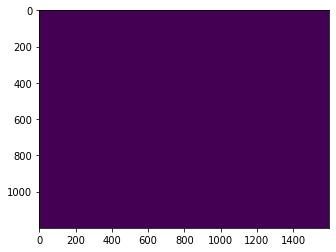

In [47]:
save_selected_detections([contours], mask_d)

In [34]:
def get_rotated_cropped_image(image, rect):
    (x, y), (width, height), angle = rect
    # image_center = tuple(np.array(image.shape[1::-1]) / 2)
    # rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    # rotated_image = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    img_copy = image.copy()
    
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    Xs = [x[0] for x in box]
    Ys = [y[1] for y in box]
    x1 = min(Xs)
    y1 = min(Ys)
    x2 = max(Xs)
    y2 = max(Ys)

    rotated = False
    if angle < -45:
        angle += 90
        rotated = True

    center = (int((x1+x2)/2), int((y1+y2)/2))
    size = (int(x2-x1), int(y2-y1))

    rotation_matrix = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

    cropped_barcode_reg = cv2.getRectSubPix(img_copy, size, center)
    cropped_barcode_reg = cv2.warpAffine(cropped_barcode_reg, rotation_matrix, size)
    
    cropped_width = width if not rotated else height 
    cropped_height = height if not rotated else width

    cropped_barcode_reg_tight = cv2.getRectSubPix(cropped_barcode_reg, 
                                                  (int(cropped_width), int(cropped_height)), 
                                                  (size[0]/2, size[1]/2))

    return cropped_barcode_reg_tight

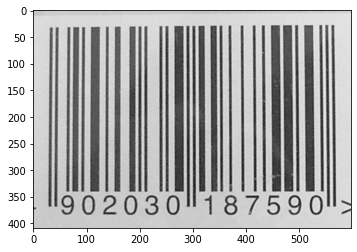

In [35]:
cropped_barcode_reg = get_rotated_cropped_image(gray, rect)
# aligned_mask = rotate_image(mask_one, angle)
# aligned_gray_masked = cv2.bitwise_and(aligned_gray, aligned_gray, mask=aligned_mask)

"""
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(aligned_gray, cmap='Greys_r', vmin=0, vmax=255)
plt.show()
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(cropped_barcode_reg, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

In [81]:
def get_files(folder_path, ext=[], return_full_path=False):
    _files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f[-3:] in ext]
    if return_full_path:
        _files = [os.path.join(folder_path, f) for f in _files]
    return _files

In [82]:
d1 = get_files("./BarcodeDatasets/Dataset1", ext=["jpg", "JPG"], return_full_path=True)
d2 =  get_files("./BarcodeDatasets/Dataset2", ext=["jpg", "JPG"], return_full_path=True)

In [2]:
for f in d1:
    
    print(f)
    
    image = cv2.imread(f)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    regions, hulls = get_msers(gray)
    cropped_barcode_reg = get_barcode_region(hulls)
    
    decode(cropped_barcode_reg)
    
    show_barcode(cropped_barcode_reg, outpath=os.path.join("results/Dataset1", "barcode_" + f.split("/")[-1]))

NameError: name 'd1' is not defined

     epoch  accuracy  binary_accuracy      loss  val_accuracy  \
0        0  0.543636         0.541818  0.692358        0.5000   
1        1  0.675455         0.675455  0.676533        0.5000   
2        2  0.671364         0.671364  0.668943        0.5000   
3        3  0.666364         0.666364  0.662833        0.5000   
4        4  0.681364         0.681364  0.654483        0.5000   
..     ...       ...              ...       ...           ...   
195    195  0.840909         0.840909  0.346272        0.8125   
196    196  0.847273         0.847273  0.355624        0.8000   
197    197  0.843636         0.843636  0.349041        0.8000   
198    198  0.850000         0.850000  0.345397        0.8125   
199    199  0.831818         0.831818  0.359142        0.7750   

     val_binary_accuracy  val_loss  
0                 0.5000  0.685277  
1                 0.5000  0.668902  
2                 0.5000  0.680166  
3                 0.5000  0.688168  
4                 0.5000  0.674291

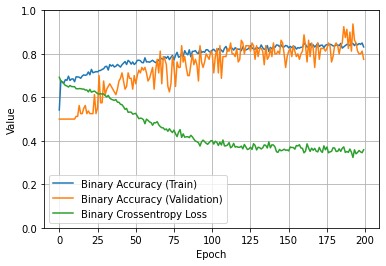

In [144]:
training_metrics = pd.read_csv("../results/training_log.csv")
print(training_metrics)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(training_metrics['epoch'], training_metrics['binary_accuracy'], label="Binary Accuracy (Train)")
ax.plot(training_metrics['epoch'], training_metrics['val_binary_accuracy'], label="Binary Accuracy (Validation)")
ax.plot(training_metrics['epoch'], training_metrics['loss'], label="Binary Crossentropy Loss")
plt.legend(loc="lower left")
plt.grid()
plt.ylim([0.0, 1.0])
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.savefig("../results/training.png")
plt.show()

In [145]:
a = training_metrics[training_metrics['val_binary_accuracy']==training_metrics['val_binary_accuracy'].max()]
print(a)

     epoch  accuracy  binary_accuracy      loss  val_accuracy  \
192    192  0.847727         0.847727  0.323521        0.9375   

     val_binary_accuracy  val_loss  
192               0.9375  0.276326  


In [140]:
def save_selected_detections(selected_contours, mask_d):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    canvas = np.ones((mask_d.shape[0], mask_d.shape[1], 3), dtype=np.int8)*150
    for _contours in selected_contours:
        # print(_countours)
        cv2.drawContours(canvas, _contours, -1, (0, 100, 0), -1)
        rect = cv2.minAreaRect(_contours[0])
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(canvas,[box],0,(255,0,0),3)
    
    plt.imshow(canvas)
    plt.show()

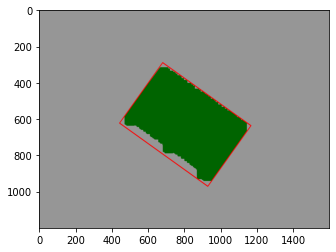

In [141]:
save_selected_detections([contours], mask_d)